imports

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams

In [7]:
df = pd.read_csv("read_bytes.csv", parse_dates=['Time'], index_col='Time')
df.columns = ['bytes_read']
print(df.head())

                     bytes_read
Time                           
2025-04-28 17:28:00           0
2025-04-28 17:28:15           0
2025-04-28 17:28:30           0
2025-04-28 17:28:45     1761280
2025-04-28 17:29:00     1761280


# plotting different time series

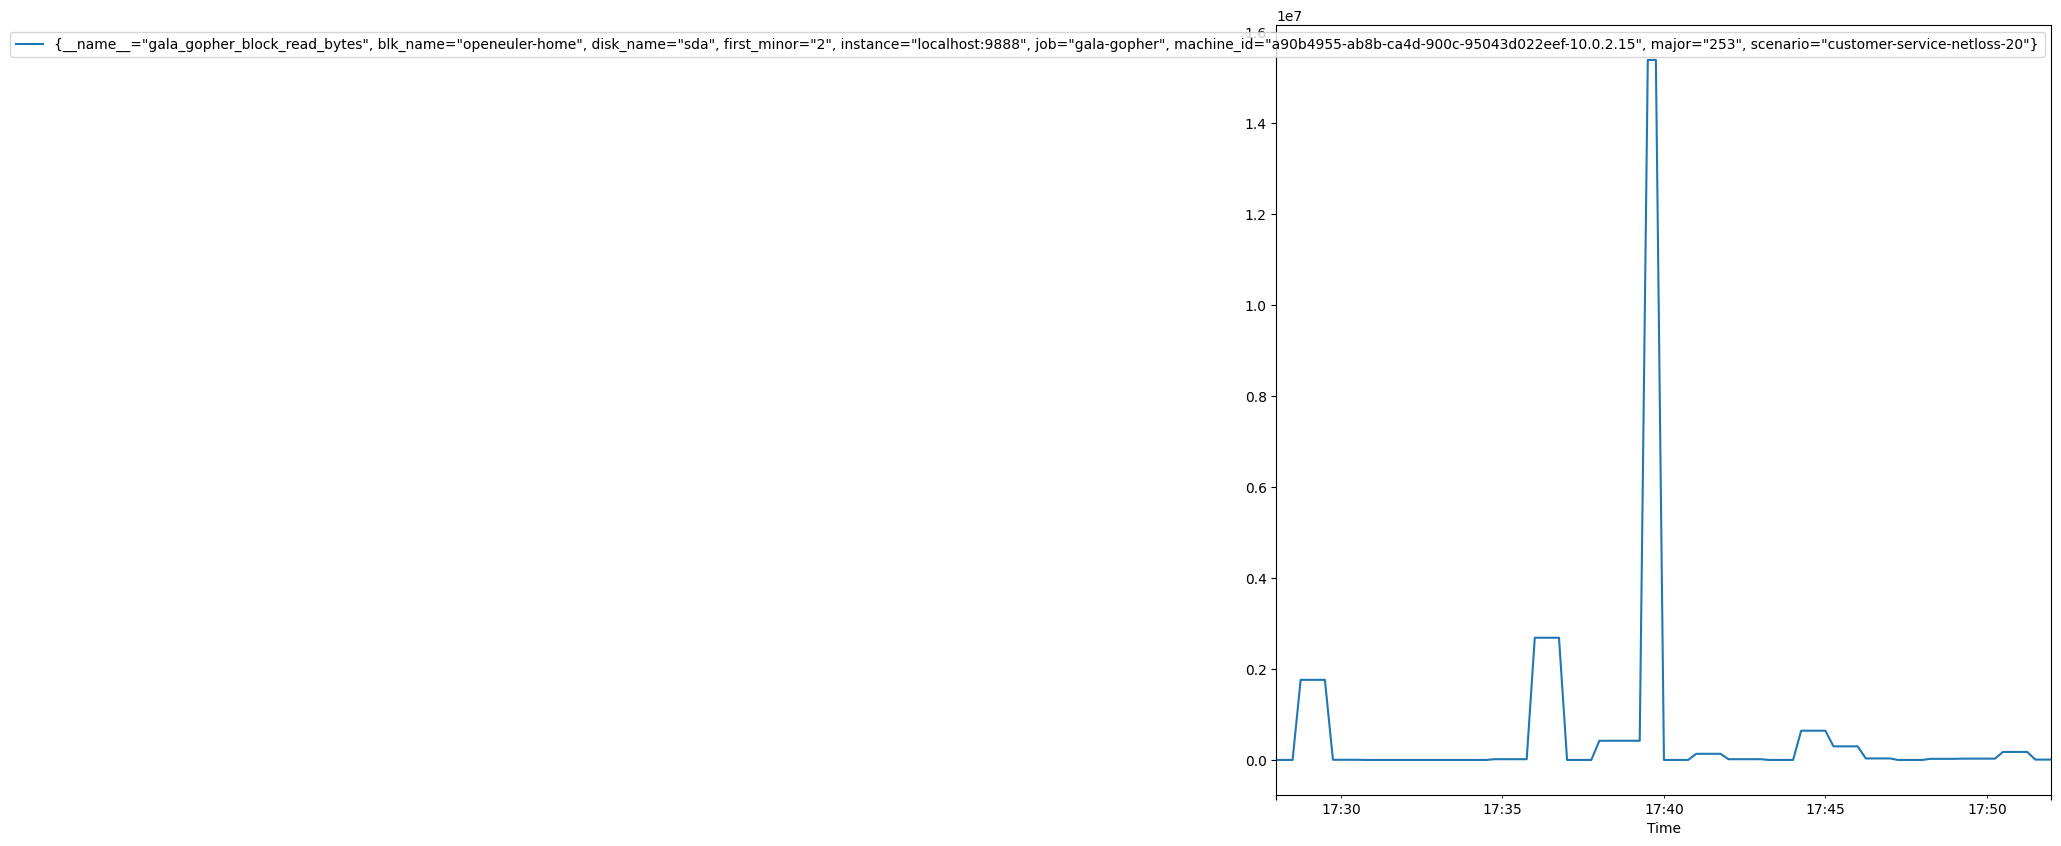

In [4]:
ax = df.plot(figsize=(10,10))
plt.show()